In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.shape

(2200, 8)

In [10]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
x=df.drop('label',axis=1)

In [12]:
y=df['label']

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1863 to 1061
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [20]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1276 to 1263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            440 non-null    int64  
 1   P            440 non-null    int64  
 2   K            440 non-null    int64  
 3   temperature  440 non-null    float64
 4   humidity     440 non-null    float64
 5   ph           440 non-null    float64
 6   rainfall     440 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred1=model1.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
logistic_acc=accuracy_score(y_test,y_pred1)
print("Logistic regreession accuracy is : ",logistic_acc)

Logistic regreession accuracy is :  0.9704545454545455


In [36]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
Deci=accuracy_score(y_test,y_pred2)
print("Decision Tree Classifier accuracy is : ",Deci)

Decision Tree Classifier accuracy is :  0.9954545454545455


In [38]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
Rand=accuracy_score(y_test,y_pred3)
print("Random Forest Classifier accuracy is : ",Rand)




Random Forest Classifier accuracy is :  0.9977272727272727


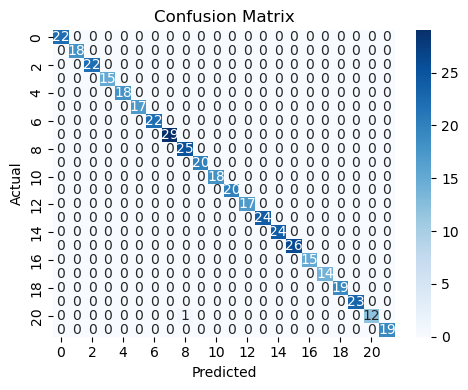

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Plot as heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


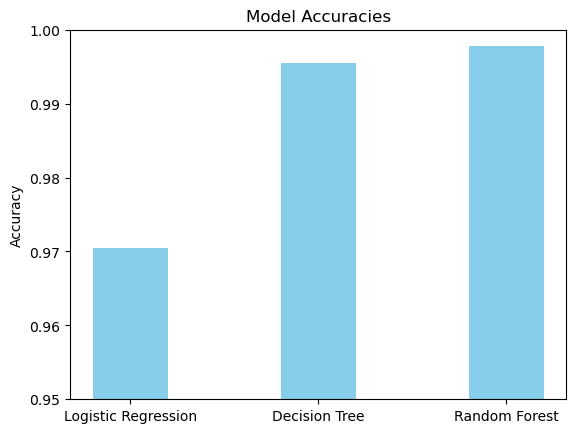

In [52]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.9704545454545455, 0.9954545454545455, 0.9977272727272727]

plt.bar(models, accuracies, color='skyblue',width=0.4)
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.95, 1)  # zoom in a bit

plt.show()
